# Explore 2020 Candidate Tweets for Practice Presentation
This notebook goes through exploration of 2020 candidate tweets so that content is available for project practice presentation 4/28/2020.

In [32]:
import bz2
import json
import time
from datetime import datetime
import collections
import pandas as pd
import numpy as np
import re
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
%matplotlib inline
# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
def get_date(created_at):
    """Function to convert Twitter created_at to date format
    Argument:
        created_at {[str]} -- [raw tweet creation date time stamp]
    Returns:
        [str] -- [date e.g. '2020-04-18']
    """
    return time.strftime('%Y-%m-%d', time.strptime(created_at, '%a %b %d %H:%M:%S +0000 %Y'))

def get_date_time(tweetdate):
    """Function to convert twitter date to date time object
    
    Arguments:
        tweetdate {[str]} -- [twitter created at date]
    
    Returns:
        [datetime.datetime] -- [date time object]
    """
    ts = time.strftime(
        '%Y-%m-%d %H:%M:%S',
        time.strptime(tweetdate, '%a %b %d %H:%M:%S +0000 %Y')
    )
    dt = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
    return dt

def clean_tweet(tweet):
    """Utility function to clean tweet text by removing links
    , hashtags, @mentions, and numbers
        using simple regex statements. Converts text to lowercase
    
    Arguments:
        tweet {[str]} -- [tweet text]
    
    Returns:
        [str] -- [clean tweet text]
    """    
    # remove links, hashtags, mentions, convert to lowercase
    pattern = re.compile("(\\w+:\\/\\/\\S+)|(#[A-Za-z0-9]+)|(@[A-Za-z]+[A-Za-z0-9-_]+)")
    tweet = re.sub(pattern, ' ', tweet).lower() 
    # remove numbers
    words = tweet.split()
    reformed = [word for word in words if not re.match('\\d', word)]
    tweet = ' '.join(reformed)
    out = ' '.join(tweet.split())
    return out

## Read 2020 Candidate Tweets

In [3]:
fname = "data/2020_candidate_tweets.json"
with bz2.BZ2File(fname, 'r') as fin:
  data = json.loads(fin.read().decode('utf-8'))

In [4]:
print("Tweets collected from {:d} candidates".format(len(data)))

Tweets collected from 33 candidates


## Number of Tweets and Timeframe of Tweets by User

In [5]:
for user in data.keys():
    tweets = data[user]
    datelist = [get_date(tweet['created_at']) for tweet in tweets]
    start = min(datelist)
    end = max(datelist)
    #print(user, len(data[user]), "from: {:s} to: {:s}".format(start, end))
    print("User: {:s} | Number of tweets: {:d} | from: {:s} to: {:s}".format(user, len(data[user]), start, end))

User: amyklobuchar | Number of tweets: 3239 | from: 2019-02-18 to: 2020-04-18
User: AndrewYang | Number of tweets: 3215 | from: 2020-01-06 to: 2020-04-18
User: BernieSanders | Number of tweets: 3238 | from: 2019-09-07 to: 2020-04-18
User: BetoORourke | Number of tweets: 3228 | from: 2018-11-06 to: 2020-04-18
User: BilldeBlasio | Number of tweets: 2159 | from: 2016-10-19 to: 2020-03-12
User: GovBillWeld | Number of tweets: 1002 | from: 2019-02-14 to: 2020-03-23
User: CoryBooker | Number of tweets: 3230 | from: 2018-10-12 to: 2020-04-18
User: DevalPatrick | Number of tweets: 2032 | from: 2011-03-25 to: 2020-03-07
User: realDonaldTrump | Number of tweets: 3222 | from: 2019-12-31 to: 2020-04-18
User: ewarren | Number of tweets: 3210 | from: 2019-10-08 to: 2020-04-18
User: ericswalwell | Number of tweets: 3239 | from: 2018-07-30 to: 2020-04-16
User: JayInslee | Number of tweets: 3206 | from: 2019-05-04 to: 2020-04-17
User: JoeSestak | Number of tweets: 3189 | from: 2015-07-17 to: 2020-02-15

## The List of All Tweets

In [6]:
tweetslist = [tweet for user in data for tweet in data[user]]
print("A total of {:d} tweets were collected".format(len(tweetslist)))

A total of 97316 tweets were collected


## Plot of Tweet Times
Tweet date times are in GMT (Greenwich Mean Time) (7 hours ahead of PST | 4 hours ahead of EST)

In [7]:
dtlist = [get_date_time(tweet['created_at']) for tweet in tweetslist]

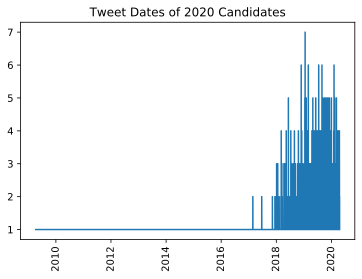

In [8]:
X,Y = np.unique(dtlist, return_counts=True)
plt.plot(X, Y)
plt.xticks(rotation=90)
plt.title("Tweet Dates of 2020 Candidates")
#plt.savefig('plt_tweet_time.png', bbox_inches = 'tight')

plt.show()

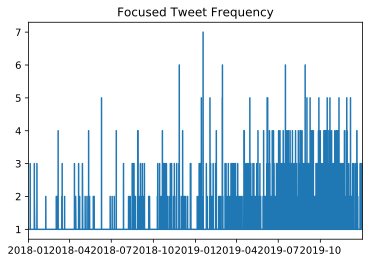

In [9]:
plt.plot(X,Y)
plt.xlim(xmin = datetime(2018,1,1, hour=0), xmax = datetime(2019,12,31, hour=23))
plt.title("Focused Tweet Frequency")

plt.show()

## Plot of Top 10 Candidates by Number of Tweets

Text(0.5, 1.0, 'Top 10 2020 Candidates by Tweet Count')

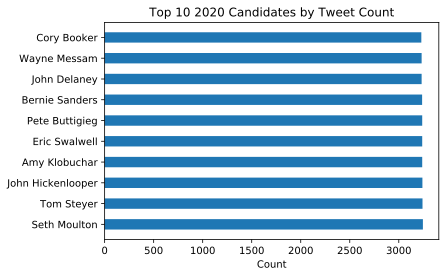

In [10]:
%matplotlib inline
userlist = [tweet['user']['name'] for tweet in tweetslist]
counter = collections.Counter(userlist)
top10users = counter.most_common(10)
labels, values = zip(*top10users)
indexes = np.arange(len(labels))
width = 0.5 
plt.barh(indexes, values, width)
plt.yticks(indexes, labels)
plt.xlabel('Count')
plt.title("Top 10 2020 Candidates by Tweet Count")
#plt.savefig('plt_top_users.png', bbox_inches = 'tight')

## Plot all Candidates for Presentation

In [11]:
df = pd.read_excel('data/People.xlsx')
df = df[df['Ran 2020'] == 1]

In [12]:
df['Party'].value_counts()

Democratic     28
Republican      5
Independent     1
Name: Party, dtype: int64

In [13]:
partydict = {}
for idx, row in df.iterrows():
    partydict[row['Handle']] = row['Party']

In [14]:
handlelist = [tweet['user']['screen_name'] for tweet in tweetslist]    
counter = collections.Counter(handlelist)
labels, values = zip(*counter.items())
colorlist = []
for label in labels:
    if partydict[label] == 'Republican':
        val = 'red'
    elif partydict[label] == 'Democratic':
        val = 'blue'
    else: 
        val = 'orange'
    colorlist.append(val)

In [15]:
collections.Counter(colorlist)

Counter({'blue': 27, 'orange': 1, 'red': 5})

In [16]:
userlist = [tweet['user']['name'] for tweet in tweetslist]
counter = collections.Counter(userlist)
labels, values = zip(*counter.items())
indexes = np.arange(len(labels))

Text(0.5, 1.0, 'Candidate Tweet Counts')

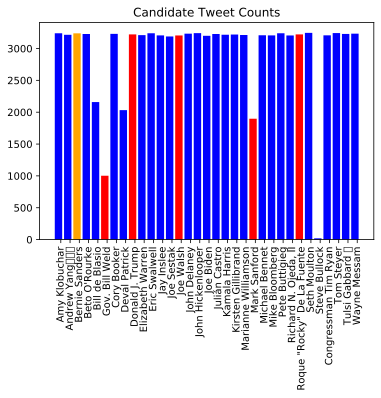

In [17]:
plt.bar(indexes, values, color = colorlist)
plt.xticks(indexes + width * 0.5, labels)
plt.xticks(rotation=90)
#plt.yticks(indexes, labels)
#plt.xlabel('Count')
plt.title("Candidate Tweet Counts")

## Plot of Retweet Counts

The average retweet count is 1346.23
The median retweet count is 75.00


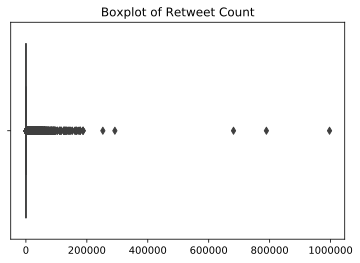

In [18]:
rtlist = [tweet['retweet_count'] for tweet in tweetslist]
fig, ax = plt.subplots()
sns.boxplot(rtlist, ax=ax).set_title("Boxplot of Retweet Count")
#plt.savefig('plt_rt_counts.png', bbox_inches = 'tight')
print("The average retweet count is {:.2f}".format(np.mean(rtlist)))
print("The median retweet count is {:.2f}".format(np.median(rtlist)))

## Plot of Languages Present in Tweets

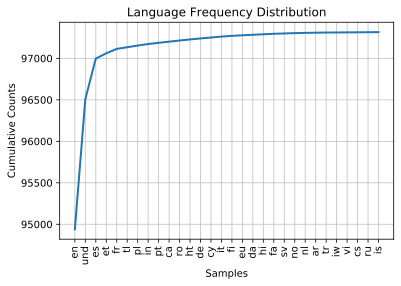

In [19]:
languagelist = [tweet['lang'] for tweet in tweetslist]
FreqDist(languagelist).plot(100, cumulative = True, title = 'Language Frequency Distribution')

## Cleaned Language List

In [20]:
stop_words = set(stopwords.words('english'))
tweettexts = [clean_tweet(tweet['text']) for tweet in tweetslist] # list of strings of tweets
tweetdocs = [word_tokenize(tt) for tt in tweettexts] # tokenized tweets

## Corpus Statistics

In [21]:
# tweet statistics
print("tweet level statistics:\n")
# average number of characters per tweet
avg_chars = int(sum([len(t) for t in tweettexts]) / len(tweettexts))
print("Average number of characters per tweet: {:d}".format(avg_chars))
# average number of words per tweet
avg_words = int(sum([len(doc) for doc in tweetdocs]) / len(tweetdocs))
print("Average number of words per tweet: {:d}".format(avg_words))
# average vocabulary size per tweet
avg_vocab = int(sum([len(set(doc)) for doc in tweetdocs]) / len(tweetdocs))
print("Average vocabulary size per tweet: {:d}".format(avg_vocab))
# average lexical richness per tweet (proportion of unique words to total words)
avg_lex_rich = sum([len(set(doc))/len(doc) for doc in tweetdocs if len(doc) > 0]) / len(tweetdocs)
print("Average lexical richness per tweet: {:.2f}".format(avg_lex_rich))

tweet level statistics:

Average number of characters per tweet: 95
Average number of words per tweet: 19
Average vocabulary size per tweet: 17
Average lexical richness per tweet: 0.91


In [22]:
# corpus statistics
print("\nCorpus level statistics:\n")
words = []
for doc in tweetdocs:
    words.extend(doc)
# total number of words
print("Total number of words: {:d}".format(len(words)))
# vocabulary size
print("Total vocabulary size: {:d}".format(len(set(words))))
# lexical richness
print("Total lexical richness: {:.2f}".format(len(set(words)) / len(words)))
# average number of characters per word
word_lengths = [len(w) for w in words]
print("Average number of characters per word: {:.2f}".format(sum(word_lengths) / len(word_lengths)))


Corpus level statistics:

Total number of words: 1914358
Total vocabulary size: 50611
Total lexical richness: 0.03
Average number of characters per word: 4.02


In [23]:
#removing stopwords and punctuation
filtered_words = [w for w in words if w.isalpha() if not w in stop_words]

## Term Frequency

In [25]:
# Frequency distributions
fdist = FreqDist(filtered_words)
print("Top 50 Most Common Words:")
print(fdist.most_common(50))

Top 50 Most Common Words:
[('rt', 20781), ('trump', 6820), ('people', 5841), ('president', 5234), ('amp', 5040), ('today', 4797), ('need', 4588), ('new', 4164), ('us', 4056), ('one', 3983), ('thank', 3750), ('time', 3391), ('country', 3276), ('make', 2950), ('great', 2877), ('like', 2763), ('get', 2756), ('every', 2729), ('climate', 2722), ('day', 2664), ('health', 2530), ('must', 2510), ('america', 2467), ('american', 2374), ('right', 2365), ('care', 2259), ('campaign', 2258), ('first', 2195), ('change', 2172), ('americans', 2148), ('would', 2099), ('know', 2086), ('thanks', 2067), ('work', 2043), ('plan', 1995), ('going', 1972), ('let', 1957), ('iowa', 1956), ('support', 1902), ('donald', 1898), ('state', 1885), ('take', 1870), ('years', 1845), ('see', 1829), ('want', 1819), ('fight', 1818), ('help', 1794), ('last', 1787), ('many', 1775), ('women', 1746)]


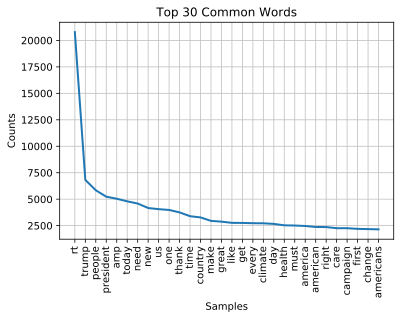

In [26]:
# plot frequency distribution
fdist.plot(30, title = 'Top 30 Common Words')

## Sentiment Polarity

In [35]:
#!pip install textblob
from textblob import TextBlob
scorelist = [TextBlob(tweet).sentiment.polarity for tweet in tweettexts]

count    97316.000000
mean         0.123588
std          0.286321
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
dtype: float64


Text(0.5, 1.0, 'Boxplot of Polarity (TextBlob)')

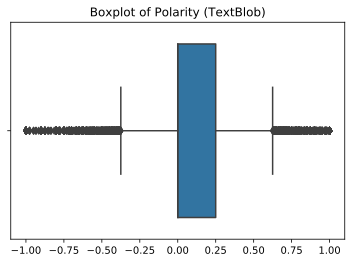

In [36]:
# plot polarity distribution / center
print(pd.Series(scorelist).describe())
fig, ax = plt.subplots()
sns.boxplot(scorelist, ax=ax).set_title("Boxplot of Polarity (TextBlob)")
#plt.savefig('plt_textblob_polarity.png', bbox_inches = 'tight')

## Sentiment Label Frequency

In [37]:
def get_sentiment(score):
    """Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
    
    Arguments:
        scores {[float]} -- [Textblob score]
    
    Returns:
        [str] -- [sentiment label]
    """    
    # set sentiment
    if score > 0:
        return 'pos'
    elif score == 0:
        return 'neu'
    else:
        return 'neg'    

Text(0.5, 1.0, 'Sentiment Frequency')

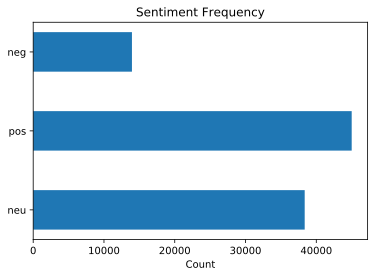

In [38]:
sentlist = [get_sentiment(score) for score in scorelist]
counter = collections.Counter(sentlist)
labels = counter.keys()
values = counter.values()
indexes = np.arange(len(labels))
width = 0.5 
plt.barh(indexes, values, width)
plt.yticks(indexes, labels)
plt.xlabel('Count')
plt.title("Sentiment Frequency")

## Word Cloud of Tweets

In [41]:
#!pip install wordcloud
from wordcloud import WordCloud
text = ' '.join(word for word in filtered_words)
wordcloud = WordCloud(background_color="white").generate(text)

     |████████████████████████████████| 163kB 2.2MB/s eta 0:00:01


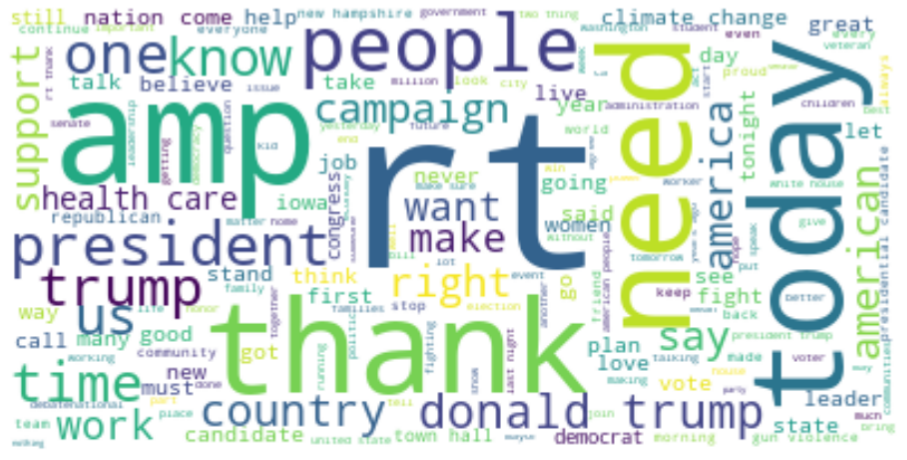

In [51]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('word_cloud_vector.pdf', format='pdf')
plt.savefig('wordcloud')
plt.show()


## Dendrogram of Tweets by 2020 Candidate

In [52]:
handles = set(handlelist) # unique users
usertweets = {} # dictionary of users and tweet text
for user in data.keys():
    usertweets[user] = ' '.join(clean_tweet(tweet['text']) for tweet in data[user] if tweet['lang'] == 'en')

In [53]:
# dataframe of users and tweet text
df1 = pd.DataFrame(usertweets.items(), columns = ['user','text']).set_index('user')
df1.head()

text
user                                                            
amyklobuchar   minnesota ranks in responses for the census! l...
AndrewYang     the trickle-up economy must become a reality a...
BernieSanders  instead of bailing out the health care insuran...
BetoORourke    rt : more americans died from covid-19 yesterd...
BilldeBlasio   advanced feudalism! . makes a powerful point: ...

In [54]:
# vectorize text by user into a dataframe
from sklearn.feature_extraction.text import CountVectorizer
token_pattern = re.compile(r'[A-Za-z]+') # custom token pattern alphabetic words
cv = CountVectorizer(stop_words=stop_words, token_pattern=token_pattern)
dtm = cv.fit_transform(df1['text'])
feat_names = cv.get_feature_names()
print("Vocabulary size: {:d}".format(len(feat_names)))
doc_names = df1.index.values
df2 = pd.DataFrame(dtm.toarray(), index=doc_names, columns=feat_names)

Vocabulary size: 32715


In [55]:
df2.shape

(33, 32715)

In [56]:
df2.head()

aa  aaaand  aaah  aad  aalc  aamir  aapac  aapi  aapis  aarika  \
amyklobuchar    0       0     0    0     0      0      0     5      0       0   
AndrewYang      0       0     1    0     0      1      0     0      0       1   
BernieSanders   0       0     0    0     0      0      1     1      0       0   
BetoORourke     0       0     0    0     0      0      0     0      0       0   
BilldeBlasio    0       0     0    0     0      0      0     0      0       0   

               ...  zora  zquez  zte  ztelecom  zuckerberg  zuckerburg  \
amyklobuchar   ...     0      0    0         0           0           0   
AndrewYang     ...     0      0    0         0           0           1   
BernieSanders  ...     0      0    0         0           2           0   
BetoORourke    ...     0      1    0         0           1           0   
BilldeBlasio   ...     0      0    0         0           0           0   

               zuckerman  zulu  zuni  zuppo  
amyklobuchar           0     0     0      0  
AndrewYang             0     0     0      0  
BernieSanders          0     0     0      0  
BetoORourke            0     0     0      0  
BilldeBlasio           0     0     0      0  

[5 rows x 32715 columns]

In [57]:
# normalize features
from sklearn.preprocessing import normalize
data_scaled = normalize(df2)
print("The mean of feature values is {:.2f}".format(np.mean(data_scaled)))
data_scaled = pd.DataFrame(data_scaled, columns = df2.columns, index=df2.index)
data_scaled.head()

The mean of feature values is 0.00


aa  aaaand      aaah  aad  aalc     aamir     aapac      aapi  \
amyklobuchar   0.0     0.0  0.000000  0.0   0.0  0.000000  0.000000  0.004027   
AndrewYang     0.0     0.0  0.000555  0.0   0.0  0.000555  0.000000  0.000000   
BernieSanders  0.0     0.0  0.000000  0.0   0.0  0.000000  0.000663  0.000663   
BetoORourke    0.0     0.0  0.000000  0.0   0.0  0.000000  0.000000  0.000000   
BilldeBlasio   0.0     0.0  0.000000  0.0   0.0  0.000000  0.000000  0.000000   

               aapis    aarika  ...  zora     zquez  zte  ztelecom  \
amyklobuchar     0.0  0.000000  ...   0.0  0.000000  0.0       0.0   
AndrewYang       0.0  0.000555  ...   0.0  0.000000  0.0       0.0   
BernieSanders    0.0  0.000000  ...   0.0  0.000000  0.0       0.0   
BetoORourke      0.0  0.000000  ...   0.0  0.000714  0.0       0.0   
BilldeBlasio     0.0  0.000000  ...   0.0  0.000000  0.0       0.0   

               zuckerberg  zuckerburg  zuckerman  zulu  zuni  zuppo  
amyklobuchar     0.000000    0.000000        0.0   0.0   0.0    0.0  
AndrewYang       0.000000    0.000555        0.0   0.0   0.0    0.0  
BernieSanders    0.001327    0.000000        0.0   0.0   0.0    0.0  
BetoORourke      0.000714    0.000000        0.0   0.0   0.0    0.0  
BilldeBlasio     0.000000    0.000000        0.0   0.0   0.0    0.0  

[5 rows x 32715 columns]

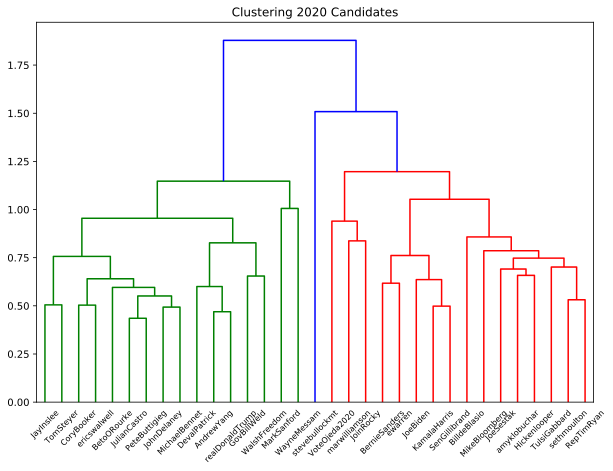

In [58]:
# plot dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Clustering 2020 Candidates")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), labels = data_scaled.index)